In [1]:
# Install datacommons_pandas
!pip install datacommons_pandas --upgrade --quiet
# Import Data Commons
import datacommons_pandas as dc

# Import other required libraries
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

import json

     |████████████████████████████████| 45 kB 2.0 MB/s 


In [2]:
# In the browser, we saw that the dcid for United States is country/USA
usa = 'country/USA'

In [3]:
# Get lists of states, counties, and cities within the United States, respectively.
states = dc.get_places_in([usa], 'State')[usa]
counties = dc.get_places_in([usa], 'County')[usa]
cities = dc.get_places_in([usa], 'City')[usa]

In [4]:
# Display the first 10 states
states[:10]

['geoId/01',
 'geoId/02',
 'geoId/04',
 'geoId/05',
 'geoId/06',
 'geoId/08',
 'geoId/09',
 'geoId/10',
 'geoId/11',
 'geoId/12']

In [5]:
# Get StatVarObservations for states.
df_state = dc.build_multivariate_dataframe(states, ['Count_Person', 'Median_Age_Person'])
# Get StatVarObservations for counties.
df_county = dc.build_multivariate_dataframe(counties, ['Count_Person', 'Median_Age_Person'])
# Get StatVarObservations for cities.
df_city = dc.build_multivariate_dataframe(cities, ['Count_Person', 'Median_Age_Person'])


In [6]:
def add_name_col(df):
  # Add a new column called name, where each value is the name for the place dcid in the index.
  df['name'] = df.index.map(dc.get_property_values(df.index, 'name'))
  
  # Keep just the first name, instead of a list of all names.
  df['name'] = df['name'].str[0]


In [7]:
add_name_col(df_state)
df_state.head()

,Count_Person,Median_Age_Person,name
place,,,
geoId/01,4876250,39.0,Alabama
geoId/02,737068,34.3,Alaska
geoId/04,7050299,37.7,Arizona
geoId/05,2999370,38.1,Arkansas
geoId/06,39283497,36.5,California


In [8]:
# Filter for all cities that have at least one person
df_city = df_city[df_city['Count_Person'] >= 1]

In [9]:
def plot_data(title, pd_table):
  """ Generate a scatter plot comparing median age and population count. """
  plt.figure(figsize=(12, 8))
  plt.title(title)
  plt.xlabel('Median Age in Years')
  plt.ylabel('Population Count (log scale)')
  
  # Scatter plot the information
  ax = plt.gca()
  ax.set_yscale('log')
  ax.scatter(pd_table['Median_Age_Person'], pd_table['Count_Person'], alpha=0.7)

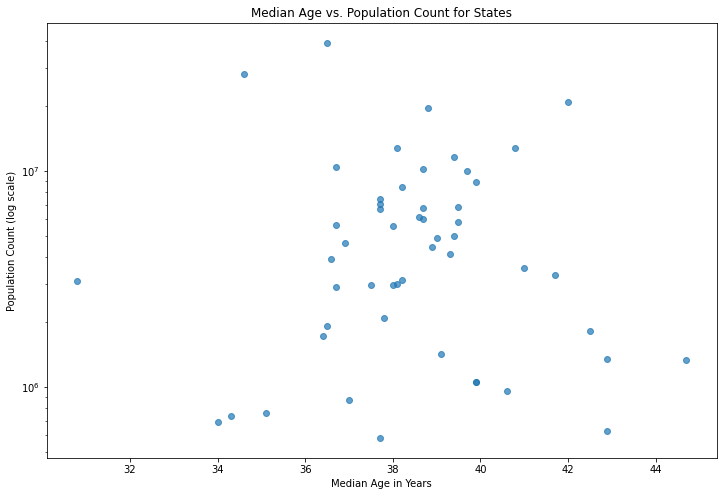

In [10]:
# Generate the plot for state data
plot_data('Median Age vs. Population Count for States', df_state)

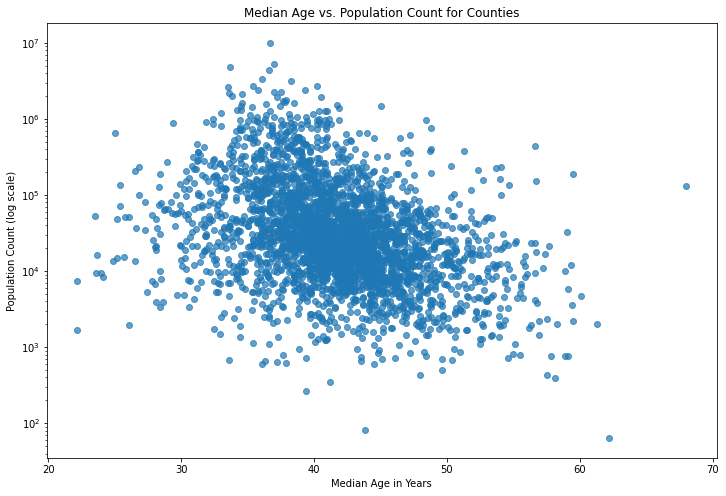

In [11]:
plot_data('Median Age vs. Population Count for Counties', df_county)

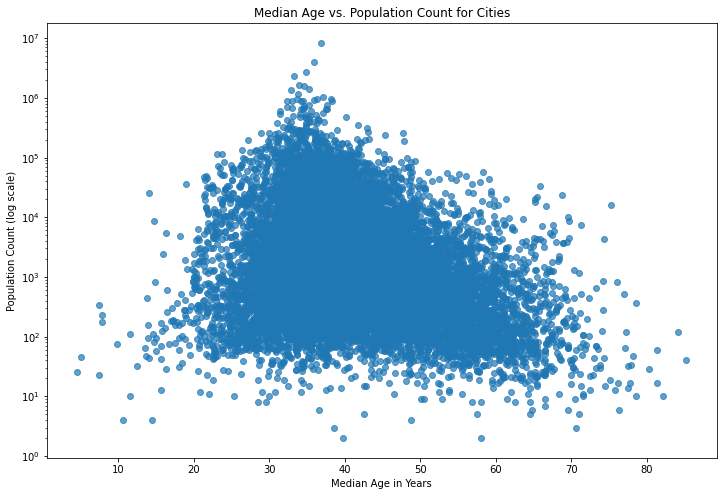

In [12]:
plot_data('Median Age vs. Population Count for Cities', df_city)

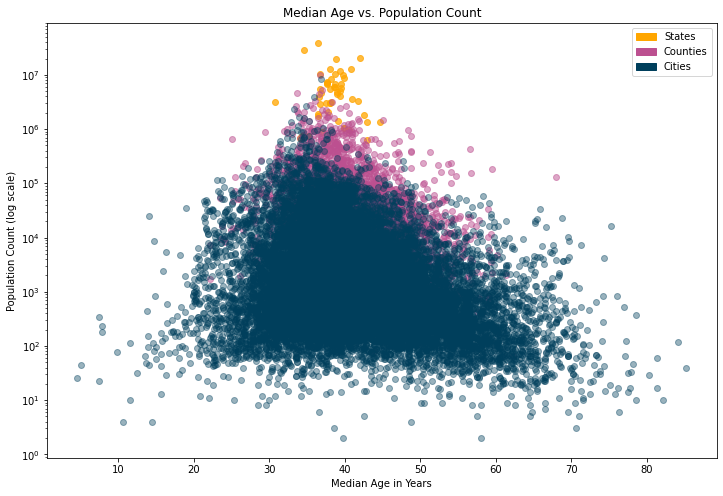

In [13]:
def plot_all_data(state_table, county_table, city_table):
  plt.figure(figsize=(12, 8))
  plt.title('Median Age vs. Population Count')
  plt.xlabel('Median Age in Years')
  plt.ylabel('Population Count (log scale)')
  
  # Make things pretty
  state_color = "#ffa600"
  county_color = "#bc5090"
  city_color = "#003f5c"
  
  # Scatter plot the information
  ax = plt.gca()
  ax.set_yscale('log')
  ax.scatter(state_table['Median_Age_Person'], state_table['Count_Person'], color=state_color, alpha=0.75)
  ax.scatter(county_table['Median_Age_Person'], county_table['Count_Person'], color=county_color, alpha=0.5)
  ax.scatter(city_table['Median_Age_Person'], city_table['Count_Person'], color=city_color, alpha=0.4)
  
  # Create the legend
  state_patch = mpatches.Patch(color=state_color, label='States')
  county_patch = mpatches.Patch(color=county_color, label='Counties')
  city_patch = mpatches.Patch(color=city_color, label='Cities')
  plt.legend(handles=[state_patch, county_patch, city_patch])

# Plot all the data together.
plot_all_data(df_state, df_county, df_city)